# Simulation 6: Baseline v. Heuristic in Ample v. Limited Resources 

TJ Kim
8/10/20

Run the simulation with settings

- 20 users, 10 servers, 10 timesteps
- Use mix of synthetic and real traces
- Job lengths: variable (arrive and depart)
- 5 Trials

Resources: Ample and Limited (comparison)

In [1]:
from IPython.core.debugger import set_trace

# Import Generic Classes
import numpy as np
import copy
import pickle
import random

# Import All Custom Classes
import os, sys
sys.path.append(os.path.pardir+"/classes")
sys.path.append(os.path.pardir+"/solvers")
sys.path.append(os.path.pardir+"/one_mobility")
sys.path.append(os.path.curdir + "/sim_store/sim6")


from Server import *
from User import *
from Link import *
from Job import *
from Migration_Plans import *
from Cost_Recordings import *

from sim7_setting import *

# Import Solver Classes
from Optim_PlanGenerator import *
from SeqGreedy_PlanGenerator import *
from Myopic_PlanGenerator import *
from Naive_PlanGenerator import *

### Run Simulations for the Limited Case

Because the batched case breaks often, we will have to do many iterations.

In [2]:
Batch_cost_stores = []
SG_cost_stores = []
Naive_cost_stores = []
Myopic_cost_stores = []

In [6]:
num_trials = 1


for i in range(num_trials):
    
    print("Trial Number:",i)
    
    # Make Users
    users, servers, links, jobs, sim_param = simulation_setting_limited()
    
    # Make Batch Prob
    
    print("batch_prob...")
    Batch_prob = SeqGreedy_PlanGenerator(users, servers, links, jobs, sim_param)
    Batch_plan = Migration_Plans(users,jobs,sim_param)
    Batch_plan.from_seq_greedy(Batch_prob)
    Batch_cost_stores += [Cost_Recordings(Batch_plan)]
    print("done!")
    
    
    # Make SG Prob
    # Set Refresh to false for SG
    refresh_rate = [0,0]
    refresh = False

    for j in range(len(jobs)):
        jobs[j].info_from_usr(users[j],refresh_rate,refresh)
    
    print("SG prob...")
    SG_prob = SeqGreedy_PlanGenerator(users, servers, links, jobs, sim_param)
    SG_plan = Migration_Plans(users,jobs,sim_param)
    SG_plan.from_seq_greedy(SG_prob)
    SG_cost_stores += [Cost_Recordings(SG_plan)]
    print("done!")
    
    # Make Naive Prob
    print("Naive prob...")
    Naive_prob = Naive_PlanGenerator(users, servers, links, jobs, sim_param)
    Naive_plan = Migration_Plans(users,jobs,sim_param)
    Naive_plan.from_seq_greedy(Naive_prob)
    Naive_cost_stores += [Cost_Recordings(Naive_plan)]
    print("done!")
    
    # Make Myopic Prob
    print("Myopic prob...")
    Myopic_prob = Myopic_PlanGenerator(users, servers, links, jobs, sim_param)
    Myopic_plan = Migration_Plans(users,jobs,sim_param)
    Myopic_plan.from_seq_greedy(Myopic_prob)
    Myopic_cost_stores += [Cost_Recordings(Myopic_plan)]
    print("done!")
    

Trial Number: 0
batch_prob...
done!
SG prob...
done!
Naive prob...
done!
Myopic prob...
self first step running out of resource
self first step running out of resource
self first step running out of resource
self first step running out of resource
self first step running out of resource
self first step running out of resource
self first step running out of resource
self first step running out of resource
self first step running out of resource
self first step running out of resource
self first step running out of resource
self first step running out of resource
self first step running out of resource
self first step running out of resource
self first step running out of resource
self first step running out of resource
self first step running out of resource
self first step running out of resource
self first step running out of resource
self first step running out of resource
self first step running out of resource
self first step running out of resource
self first step running out of r

In [7]:
# Transfer lists into limited setting
Batch_cost_stores_lim = Batch_cost_stores
SG_cost_stores_lim = SG_cost_stores
Naive_cost_stores_lim = Naive_cost_stores
Myopic_cost_stores_lim = Myopic_cost_stores

### Run Simulations for Ample Case

This will definitely break less as we place ourselves less in deadlock.

In [8]:
Batch_cost_stores = []
SG_cost_stores = []
Naive_cost_stores = []
Myopic_cost_stores = []

In [9]:
num_trials = 5


for i in range(num_trials):
    
    print("Trial Number:",i)
    
    # Make Users
    users, servers, links, jobs, sim_param = simulation_setting_ample()
    
    # Make Batch Prob
    
    print("batch_prob...")
    Batch_prob = SeqGreedy_PlanGenerator(users, servers, links, jobs, sim_param)
    Batch_plan = Migration_Plans(users,jobs,sim_param)
    Batch_plan.from_seq_greedy(Batch_prob)
    Batch_cost_stores += [Cost_Recordings(Batch_plan)]
    print("done!")
    
    
    # Make SG Prob
    # Set Refresh to false for SG
    refresh_rate = [0,0]
    refresh = False

    for j in range(len(jobs)):
        jobs[j].info_from_usr(users[j],refresh_rate,refresh)
    
    print("SG prob...")
    SG_prob = SeqGreedy_PlanGenerator(users, servers, links, jobs, sim_param)
    SG_plan = Migration_Plans(users,jobs,sim_param)
    SG_plan.from_seq_greedy(SG_prob)
    SG_cost_stores += [Cost_Recordings(SG_plan)]
    print("done!")
    
    # Make Naive Prob
    print("Naive prob...")
    Naive_prob = Naive_PlanGenerator(users, servers, links, jobs, sim_param)
    Naive_plan = Migration_Plans(users,jobs,sim_param)
    Naive_plan.from_seq_greedy(Naive_prob)
    Naive_cost_stores += [Cost_Recordings(Naive_plan)]
    print("done!")
    
    # Make Myopic Prob
    print("Myopic prob...")
    Myopic_prob = Myopic_PlanGenerator(users, servers, links, jobs, sim_param)
    Myopic_plan = Migration_Plans(users,jobs,sim_param)
    Myopic_plan.from_seq_greedy(Myopic_prob)
    Myopic_cost_stores += [Cost_Recordings(Myopic_plan)]
    print("done!")

    

Trial Number: 0
batch_prob...
done!
SG prob...
done!
Naive prob...
done!
Myopic prob...
done!
Trial Number: 1
batch_prob...
done!
SG prob...
done!
Naive prob...
done!
Myopic prob...
done!
Trial Number: 2
batch_prob...
done!
SG prob...
done!
Naive prob...
done!
Myopic prob...
done!
Trial Number: 3
batch_prob...
done!
SG prob...
done!
Naive prob...
done!
Myopic prob...
done!
Trial Number: 4
batch_prob...
done!
SG prob...
done!
Naive prob...
done!
Myopic prob...
done!


In [10]:
# Transfer lists into limited setting
Batch_cost_stores_ample = Batch_cost_stores
SG_cost_stores_ample = SG_cost_stores
Naive_cost_stores_ample = Naive_cost_stores
Myopic_cost_stores_ample = Myopic_cost_stores

### Process and Plot Data

In [11]:
# Log the costs of interest
num_trials = len(Batch_cost_stores)

SG_total_sum_lim = np.zeros(num_trials)
SG_total_sum_ample = np.zeros(num_trials)

Batch_total_sum_lim = np.zeros(num_trials)
Batch_total_sum_ample = np.zeros(num_trials)

Myopic_total_sum_lim = np.zeros(num_trials)
Myopic_total_sum_ample = np.zeros(num_trials)

Naive_total_sum_lim = np.zeros(num_trials)
Naive_total_sum_ample = np.zeros(num_trials)

for i in range(num_trials):

    SG_total_sum_lim[i] += SG_cost_stores_lim[i].all_cost_cumulative["total_cost"][-1]
    SG_total_sum_ample[i] += SG_cost_stores_ample[i].all_cost_cumulative["total_cost"][-1]
    
    Batch_total_sum_lim[i] += Batch_cost_stores_lim[i].all_cost_cumulative["total_cost"][-1]
    Batch_total_sum_ample[i] += Batch_cost_stores_ample[i].all_cost_cumulative["total_cost"][-1]

    Myopic_total_sum_lim[i] += Myopic_cost_stores_lim[i].all_cost_cumulative["total_cost"][-1]
    Myopic_total_sum_ample[i] += Myopic_cost_stores_ample[i].all_cost_cumulative["total_cost"][-1]
    
    Naive_total_sum_lim[i] += Naive_cost_stores_lim[i].all_cost_cumulative["total_cost"][-1]
    Naive_total_sum_ample[i] += Naive_cost_stores_ample[i].all_cost_cumulative["total_cost"][-1]

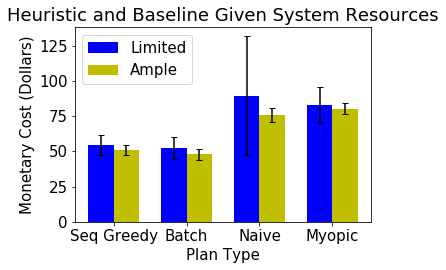

In [13]:
# Plot the plot
import matplotlib
import matplotlib.pyplot as plt

# Set Font Size Limitations
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

matplotlib.rc('font', **font)

# Set Labels
labels = ['Seq Greedy', 'Batch', 'Naive', 'Myopic']

# Obtain Values to Plot
lim_means = [np.mean(SG_total_sum_lim), 
             np.mean(Batch_total_sum_lim),
             np.mean(Myopic_total_sum_lim),
             np.mean(Naive_total_sum_lim)]

ample_means= [np.mean(SG_total_sum_ample), 
             np.mean(Batch_total_sum_ample),
             np.mean(Myopic_total_sum_ample),
             np.mean(Naive_total_sum_ample)]

lim_std = [np.std(SG_total_sum_lim), 
           np.std(Batch_total_sum_lim),
           np.std(Myopic_total_sum_lim),
           np.std(Naive_total_sum_lim)]

ample_std = [np.std(SG_total_sum_ample), 
             np.std(Batch_total_sum_ample),
             np.std(Myopic_total_sum_ample),
             np.std(Naive_total_sum_ample)]



x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x = x-width/2, height =  lim_means, yerr = lim_std,
                capsize = 3, width = width, label='Limited', color='b')
rects2 = ax.bar(x = x+width/2, height = ample_means, yerr = ample_std, 
                capsize = 3, width = width, label='Ample', color = 'y')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Plan Type')
ax.set_ylabel('Monetary Cost (Dollars)')
ax.set_title('Heuristic and Baseline Given System Resources')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Set Y axis to zero
plt.ylim(0,)

fig.tight_layout()

plt.show()